In [1]:
# Зависимости
import numpy
import pandas
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [3]:
# Приведем полученный набор данных к формату pandas.DataFrame
x = pandas.DataFrame(test_x)
print(x)

             0          1
0     0.952959   9.918190
1     4.779503   0.659825
2     1.725475   4.016698
3     4.410224   2.995258
4     6.012288  -0.889635
...        ...        ...
4995  1.333745  10.010169
4996  3.414717   3.587572
4997  1.920935   1.837116
4998 -0.599826  10.038521
4999  0.552376  10.931518

[5000 rows x 2 columns]


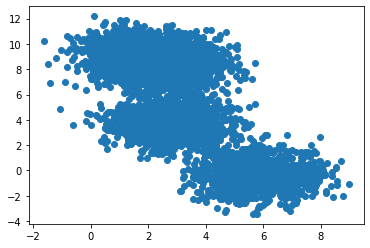

In [4]:
# Отобразим полученный набор данных в виде точек на плоскости
matplotlib.pyplot.scatter(x[0], x[1])
matplotlib.pyplot.show()

In [5]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

8600.26611375919


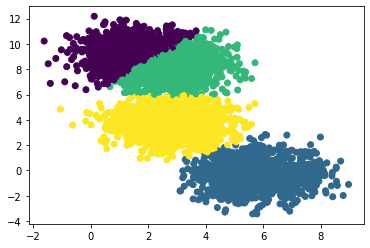

In [6]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(x[0], x[1], c = y)
matplotlib.pyplot.show()    

In [7]:
# Загрузите файл "worldcities.csv" в DataFrame.
data = pandas.read_csv("datasets/worldcities.csv")
print(data)

                city     city_ascii      lat       lng        country iso2  \
0          Malishevë      Malisheve  42.4822   20.7458         Kosovo   XK   
1            Prizren        Prizren  42.2139   20.7397         Kosovo   XK   
2        Zubin Potok    Zubin Potok  42.9144   20.6897         Kosovo   XK   
3           Kamenicë       Kamenice  42.5781   21.5803         Kosovo   XK   
4               Viti           Viti  42.3214   21.3583         Kosovo   XK   
...              ...            ...      ...       ...            ...  ...   
12954        Sturgis        Sturgis  44.4111 -103.4975  United States   US   
12955            Tea            Tea  43.4515  -96.8346  United States   US   
12956        Brandon        Brandon  43.5928  -96.5799  United States   US   
12957        Madison        Madison  44.0062  -97.1084  United States   US   
12958  Belle Fourche  Belle Fourche  44.6640 -103.8564  United States   US   

      iso3    admin_name capital  population          id  
0   

In [8]:
# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
x_label = 'lng'
y_label = 'lat'
nwe_data = data[[x_label, y_label]]
print(nwe_data)

            lng      lat
0       20.7458  42.4822
1       20.7397  42.2139
2       20.6897  42.9144
3       21.5803  42.5781
4       21.3583  42.3214
...         ...      ...
12954 -103.4975  44.4111
12955  -96.8346  43.4515
12956  -96.5799  43.5928
12957  -97.1084  44.0062
12958 -103.8564  44.6640

[12959 rows x 2 columns]


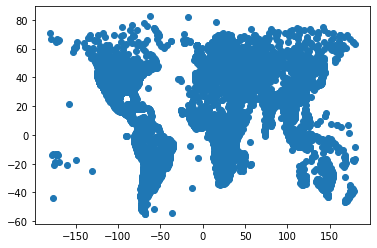

In [9]:
# Отобразите полученный DataFrame в виде точек, где координаты по оси X берутся из столбца 'lng', а координаты по оси Y - из столбца 'lat'.
matplotlib.pyplot.scatter(nwe_data['lng'], nwe_data['lat'])
matplotlib.pyplot.show()

In [10]:
# Создайте пустой список inertia для хранения результатов вычислительных экмпериментов.
inertia=[]
k=[]

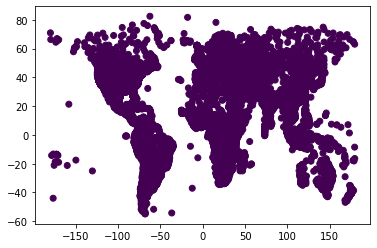

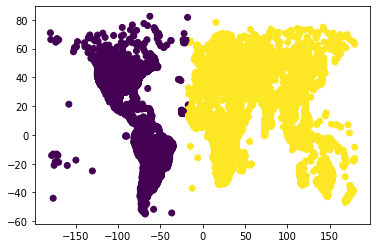

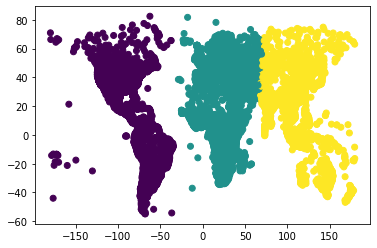

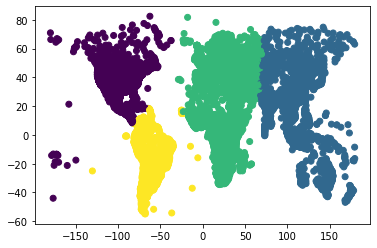

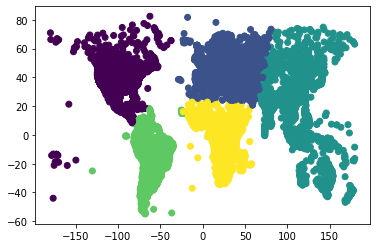

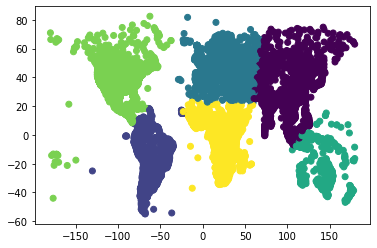

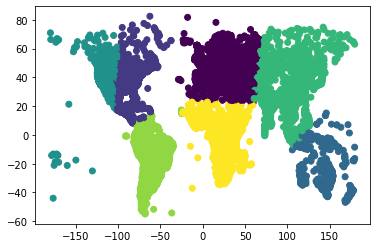

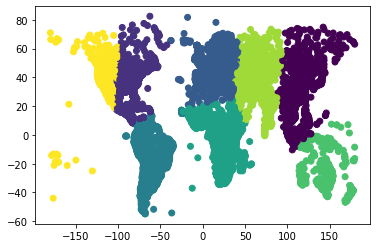

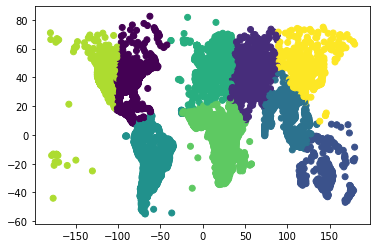

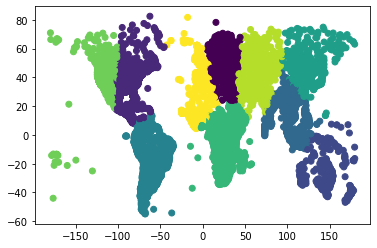

In [11]:
# Напишите цикл по количеству кластеров от 1 до 10.
# В цикле запускайте алгоритм k-средних с текущим количеством кластеров,
# добавляйте в список inertia значение для текущего результата работы алгоритма,
# отобразите набор данных, используя разные цвета для разных кластеров.
# Все шаги делайте по аналогии с примером выше.
for i in range(1,11):
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    y = kmeans.fit_predict(nwe_data)
    inertia.append(kmeans.inertia_)
    k.append(i)
    matplotlib.pyplot.scatter(nwe_data['lng'], nwe_data['lat'], c = y)
    matplotlib.pyplot.show()

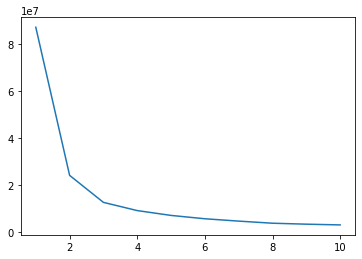

In [12]:
# Постройте график изменения величины inertia от количества кластеров.
matplotlib.pyplot.plot(k,inertia)
matplotlib.pyplot.show()